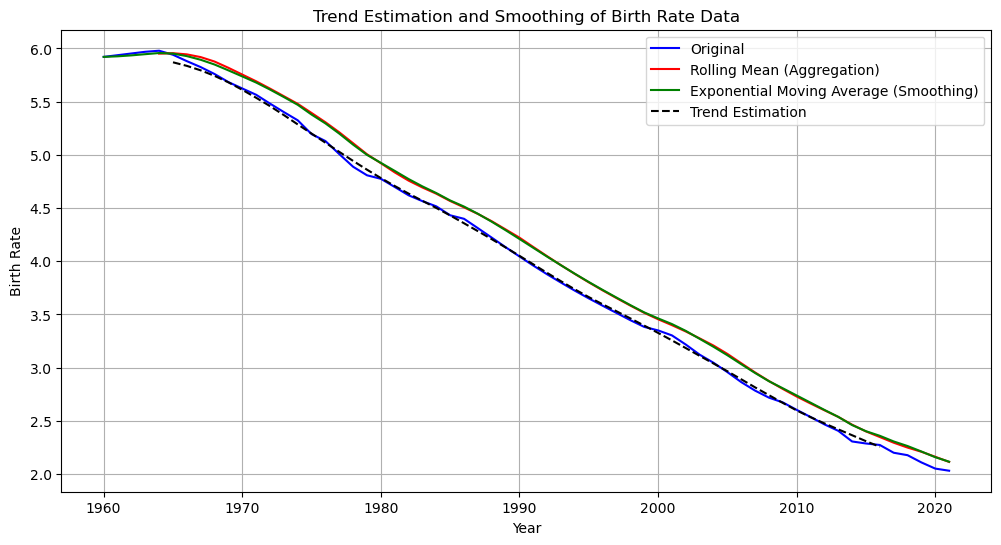

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = r"C:\Users\HDC0422251\Downloads\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162 (1)\API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_162.csv"

df = pd.read_csv(file_path, skiprows=4)
df = df[['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
         '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
         '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
         '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

# Select data for India
df = df[df['Country Name'] == 'India'].T
df.columns = ['Birth Rate']
df = df.iloc[1:].astype(float)
df.index = pd.to_datetime(df.index)

# Apply Rolling Mean for Aggregation
df['Rolling Mean'] = df['Birth Rate'].rolling(window=5).mean()

# Apply Exponential Moving Average (Smoothing)
df['EMA'] = df['Birth Rate'].ewm(span=5, adjust=False).mean()

# Trend Estimation using Seasonal Decomposition
decomposition = seasonal_decompose(df['Birth Rate'], model='additive', period=10)
df['Trend'] = decomposition.trend

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Birth Rate'], label='Original', color='blue')
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean (Aggregation)', color='red')
plt.plot(df.index, df['EMA'], label='Exponential Moving Average (Smoothing)', color='green')
plt.plot(df.index, df['Trend'], label='Trend Estimation', color='black', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title('Trend Estimation and Smoothing of Birth Rate Data')
plt.legend()
plt.grid()
plt.show()
